In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#!wget http://www.nada.kth.se/cvap/actions/person15_walking_d1_uncomp.avi

In [0]:

###Downloading the youtybe video
!pip install pytube
import pytube
video_url ='https://www.youtube.com/watch?v=ka1l4_fcEAw&list=PLEM68HUk4UIlhZD4tFzbdzTwu-u-y303v'
youtube =pytube.YouTube(video_url)
video = youtube.streams.first()
video.download('/content/')

In [0]:
pwd

In [0]:
cd '/content'

In [0]:
!mkdir 'image'

In [0]:
cd '/content/image'

In [0]:
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [0]:
#@title Specific Time Interval Frame Extraction


######Specific Time interval ############
#import cv2
#start_time_ms = 120000
#stop_time_ms = 150000
# vidcap = cv2.VideoCapture('/content/Players Hunting on Neymar Lionel Messi Cristiano Ronaldo ● Horror Fouls &amp Tackles HD.mp4')
# count = 0
# success = True
# vidcap.set(cv2.CAP_PROP_POS_MSEC,start_time_ms)
# seconds = 1
# fps = vidcap.get(cv2.CAP_PROP_FPS) # Gets the frames per second
# multiplier = fps * seconds
# #print(vidcap.get(cv2.CAP_PROP_FPS))
# while success and vidcap.get(cv2.CAP_PROP_POS_MSEC) <= stop_time_ms:
#   frameId = int(round(vidcap.get(1)))
#   #print(frameId)
#   success, image = vidcap.read()
#   if frameId % multiplier == 0:
#     print('Read a new frame: ', success)
#     cv2.imwrite("/content/image/frame%d.jpg" % count, image)
#   count += 1

In [23]:
import cv2

vidcap = cv2.VideoCapture('/content/drive/My Drive/ussoldier_combat_footage_wounded_by_taliban_snipergraphic_content.mp4')
count = 0
success = True

seconds = 1
fps = vidcap.get(cv2.CAP_PROP_FPS) # Gets the frames per second
multiplier = fps * seconds
while success:
  frameId = int(round(vidcap.get(1)))
  #print(frameId)
  success, image = vidcap.read()
  if frameId % round(multiplier) == 0:
    print('Read a new frame: ', success)
    cv2.imwrite("/content/image/frame%d.jpg" % count, image)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

##Histogram  Difference between two consecutive frames

In [0]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy
cn = 0
t = []
img_arr = [i for i in sorted_aphanumeric(os.listdir('/content/image'))]
for i in range(len(img_arr)):
  try:
    cn+=1
    img1 =cv2.imread(os.path.join('/content/image',img_arr[i]))
    img2 = cv2.imread(os.path.join('/content/image',img_arr[i+1]))
    grayImg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    grayImg1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    #hist1,bins = np.histogram(grayImg.ravel(),256,[0,256])
    #hist2,bins = np.histogram(grayImg1.ravel(),256,[0,256])
    hist1 = cv2.calcHist([grayImg],[0],None,[256],[0,256])
    hist2 = cv2.calcHist([grayImg1],[0],None,[256],[0,256])
    x = np.subtract(hist1,hist2)
    t.append(x)
  except:
    continue


###Calculating Threshold value and tweaking the parameters.
 

In [46]:
k = []
a = 1.25#####Constant value
for i in range(len(t)):
  k.append(np.sum(abs(t[i])))
mn = np.mean(k)
sd = np.std(k)
th = sd+mn*a##Threshold value we can tweak this parameter by different constanct
img_path = []
for i in range(len(k)):
  if (abs(k[i])>th):
    print("Keyframe"+'  '+"image"+str(i))
    img = cv2.imread(os.path.join('/content/image',img_arr[i]))
    #cv2_imshow(img)
    img_path.append(os.path.join('/content/image',img_arr[i]))

Keyframe  image0
Keyframe  image2
Keyframe  image3
Keyframe  image13
Keyframe  image15
Keyframe  image24
Keyframe  image26
Keyframe  image28
Keyframe  image29
Keyframe  image53
Keyframe  image54
Keyframe  image57
Keyframe  image58
Keyframe  image60
Keyframe  image61
Keyframe  image62
Keyframe  image63
Keyframe  image70
Keyframe  image72
Keyframe  image77
Keyframe  image79
Keyframe  image89
Keyframe  image90
Keyframe  image97
Keyframe  image98
Keyframe  image100
Keyframe  image101
Keyframe  image116
Keyframe  image162
Keyframe  image163
Keyframe  image165
Keyframe  image180
Keyframe  image181
Keyframe  image351
Keyframe  image365
Keyframe  image366
Keyframe  image367
Keyframe  image369


In [0]:
#@title Plotting the keyframes
#!git clone  https://github.com/luisgabriel/image-segmentation.git
#cd '/content/image/image-segmentation'

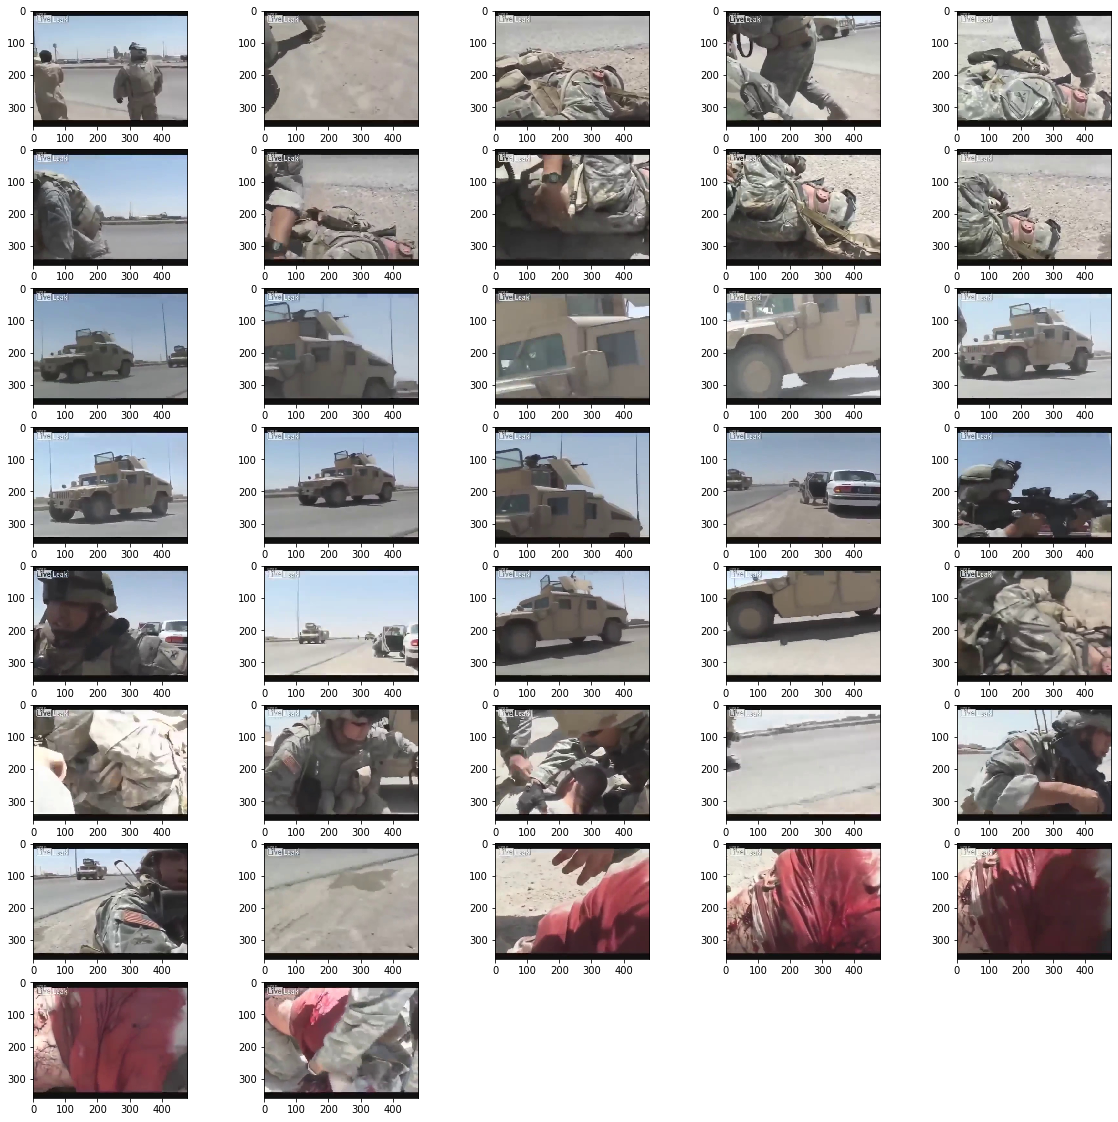

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 8
try:
  for i in range(1,len(img_path)):
      img = Image.open(img_path[i])
      
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
except:
  print("Image is not openning")
plt.show()

##Spectral Clustering

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import os,cv2

In [0]:
arr = []
arrr_path=[]
for i in sorted_aphanumeric(os.listdir('/content/image')):
  img = cv2.imread(os.path.join('/content/image',i))
  arr.append(img.ravel())
  arrr_path.append(os.path.join('/content/image',i))

Here the Important part of spectral clustering is either we can make a graph of each image or flatten all frames..


##Discretize the labels of each cluster.


In [0]:
###Implementing spectral clustering
clustering = SpectralClustering(n_clusters=5,assign_labels="discretize",random_state=0).fit(arr)

In [34]:
clustering.labels_

array([0, 3, 1, 4, 4, 3, 2, 4, 2, 0, 2, 3, 0, 1, 4, 0, 0, 3, 0, 0, 2, 2,
       1, 1, 4, 4, 1, 4, 3, 2, 3, 4, 2, 1, 1, 4, 3, 4, 3, 2, 0, 3, 3, 1,
       0, 2, 1, 1, 4, 3, 2, 1, 0, 0, 0, 3, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0,
       4, 1, 0, 0, 4, 0, 4, 3, 0, 1, 0, 0, 2, 2, 4, 3, 1, 0, 0, 1, 4, 1,
       1, 3, 2, 4, 3, 1, 0, 0, 0, 0, 2, 4, 3, 1, 2, 4, 1, 0, 0, 1, 3, 0,
       0, 1, 0, 0, 2, 2, 0, 4, 0, 1, 2, 2, 3, 1, 0, 0, 0, 4, 4, 3, 3, 1,
       0, 0, 0, 0, 4, 1, 1, 0, 1, 0, 3, 4, 4, 1, 2, 4, 2, 3, 2, 2, 1, 4,
       2, 0, 4, 2, 1, 1, 3, 4, 2, 4, 4, 1, 0, 2, 2, 0, 2, 4, 0, 4, 4, 1,
       1, 4, 0, 1, 3, 0, 4, 0, 4, 0, 4, 1, 4, 3, 0, 0, 2, 4, 0, 2, 0, 2,
       4, 0, 3, 4, 1, 0, 3, 1, 0, 4, 4, 4, 3, 2, 2, 2, 3, 2, 1, 0, 0, 0,
       2, 3, 4, 0, 4, 2, 1, 4, 3, 3, 3, 1, 3, 0, 1, 0, 3, 4, 2, 4, 4, 2,
       3, 3, 4, 0, 1, 1, 0, 1, 4, 2, 0, 3, 3, 1, 3, 4, 3, 3, 3, 4, 3, 3,
       0, 0, 2, 2, 0, 2, 4, 4, 2, 1, 2, 4, 0, 2, 3, 2, 0, 4, 4, 3, 3, 2,
       0, 4, 4, 2, 0, 2, 3, 0, 4, 1, 4, 4, 0, 4, 1,

In [0]:
x = set(clustering.labels_) 

In [0]:
t = {}
for i in x:
  cn = 0
  for k in clustering.labels_:
    if(i ==k):
      cn+=1
    t[i] = cn     

##Calulating Entropy of each cluster taking the max value 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy
m = {}
count ={}
e = 0
for i in x:
  cn = 0
  e = 0
  for k in clustering.labels_:
    if(i ==k):
      cn+=1
      #img = cv2.imread(os.path.join('/content/image',arrr_path[i]))
      rgbImg = io.imread(os.path.join('/content/image',arrr_path[i]))
      grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
      entrpy = entropy(grayImg)
      e +=entrpy
  count[i] = cn
  m[i] = e/cn

In [40]:

p = max(m, key=m.get)
print(m)

{0: 3.313192026568553, 1: 4.968922898052083, 2: 4.883491300625017, 3: 3.8308484642949243, 4: 4.561408786542204}


In [41]:
print("Max of entrpy of cluster number ",p)

Max of entrpy of cluster number  1


ok


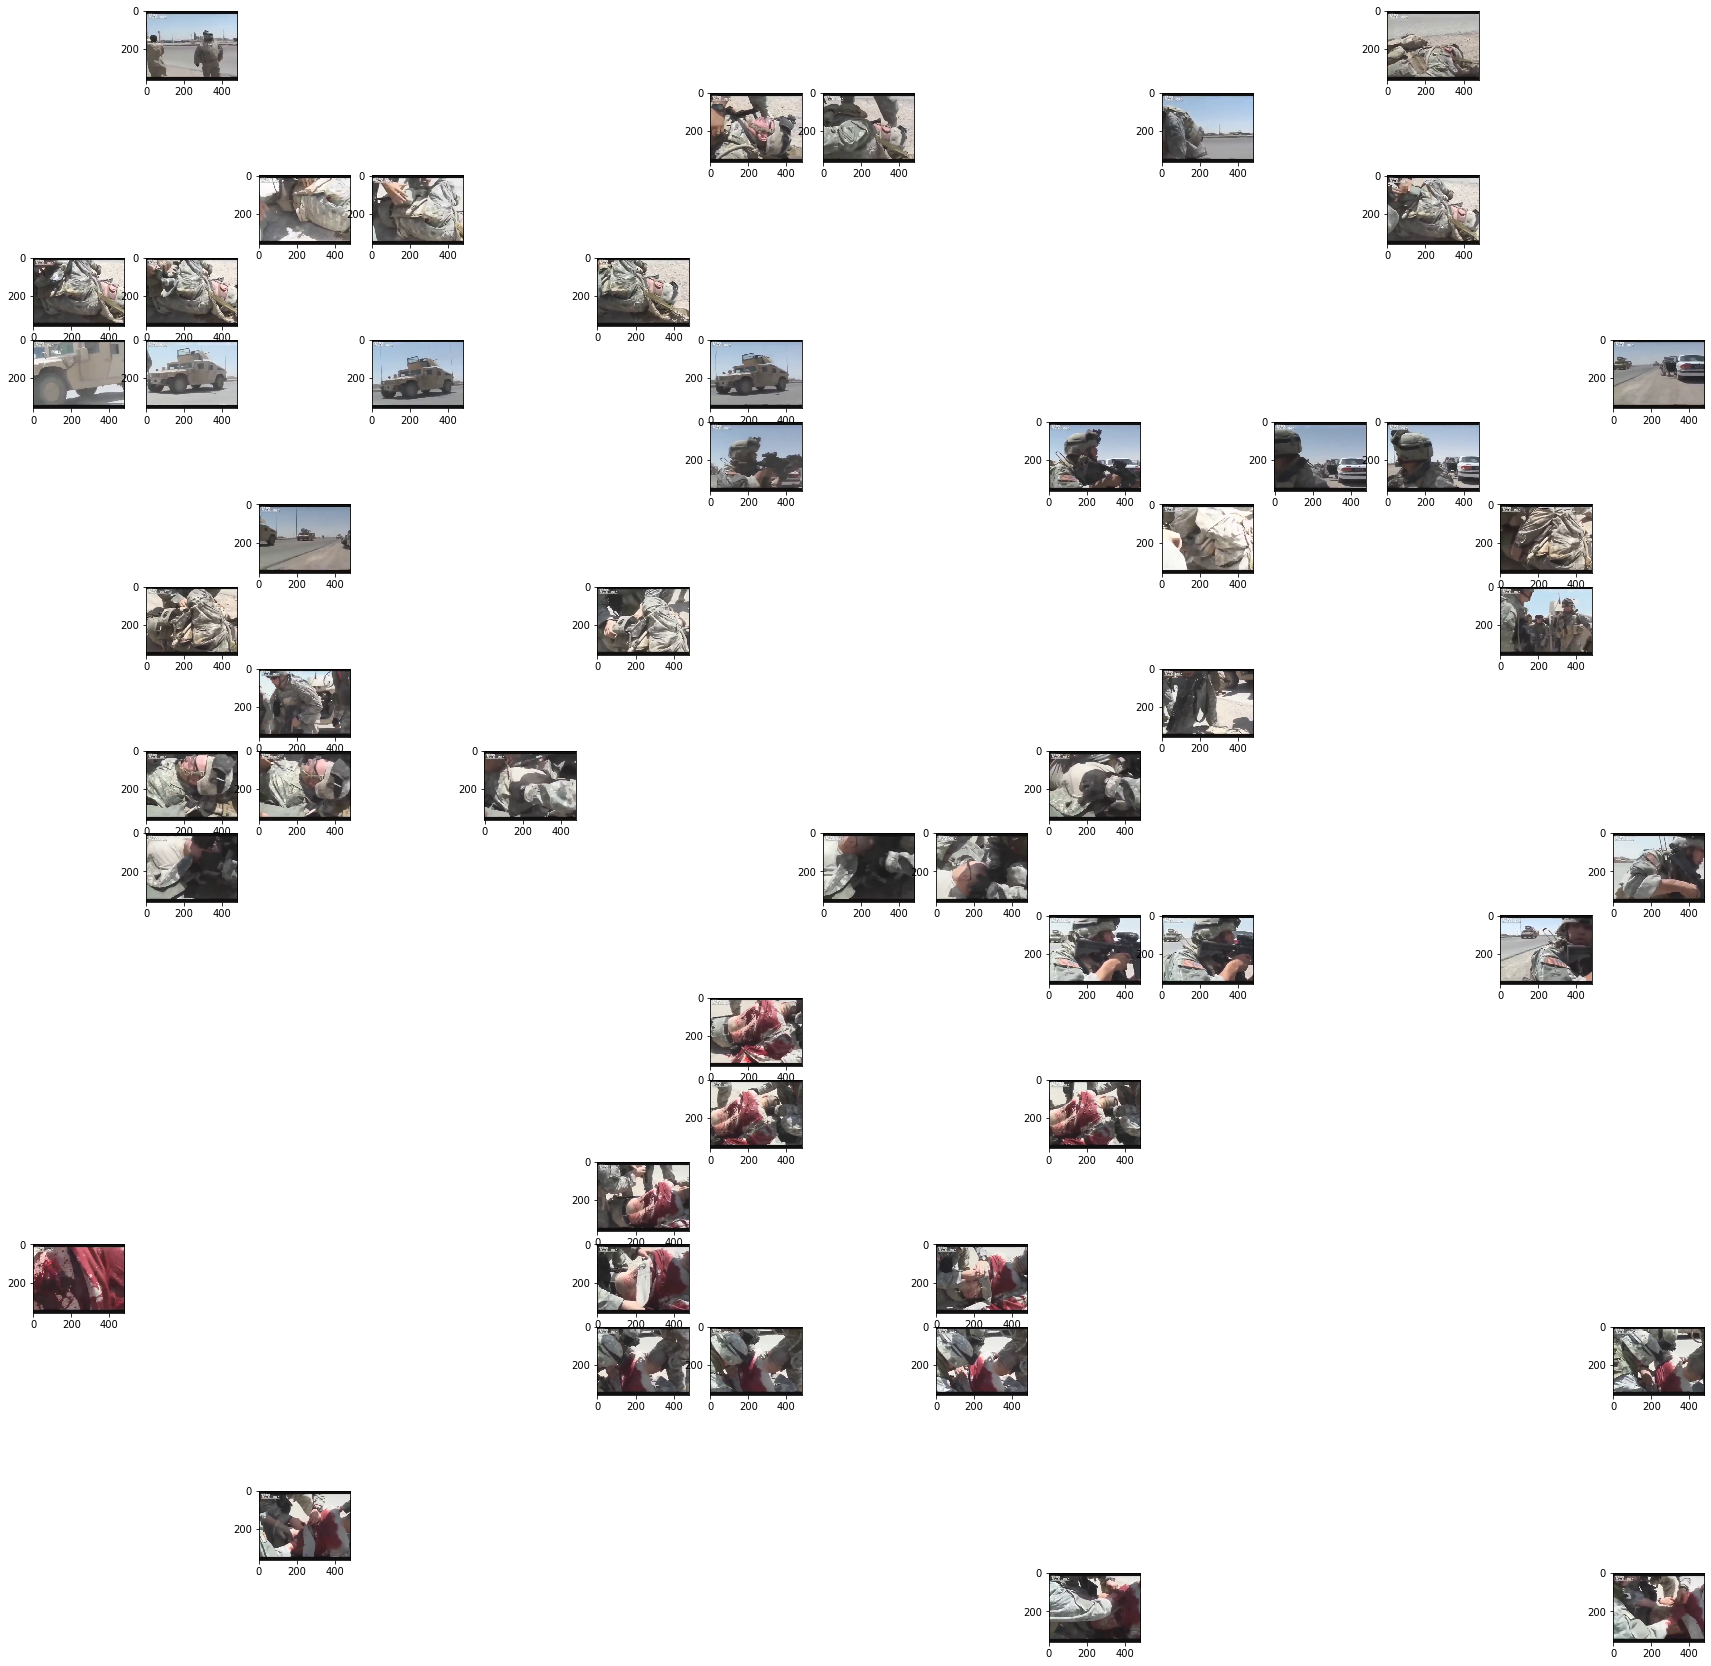

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
w=10
h=10
fig=plt.figure(figsize=(30,30))
columns = 15
rows = 20
k = 0
try:
  for i in range(1,len(clustering.labels_)):
    if(clustering.labels_[i]==p):
      img =Image.open(os.path.join('/content/image',arrr_path[i]))
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
except:
  print(" . ")
plt.show()